In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [2]:
data_encoded = pd.read_csv("Preprocessing completed-Australian Rainfall.csv")
# data_encoded.head(5)
# data_encoded.info()

In [3]:
# If two or more variables are highly correlated, including all of them might introduce multicollinearity issues, 
# which can affect the stability of the model and the interpretability of the coefficients. Hence, I am going to eliminate 
# some variables

#From the correlation matrix: 
# max temp,mintemp,temp9am,temp3pm correlated with each other
# pressure3pm & pressure9am

#based on point-biserial correlation between raintomorrow and other variables + considering correlation matrix, I can remove: 
# mintemp,maxtemp,temp9am,pressure3pm

# location & state - cramers_v 

data_encoded = data_encoded.drop(['MinTemp','MaxTemp','Temp9am','Pressure3pm','State/Province'],axis=1)
data_encoded.columns

Index(['Location', 'Latitude', 'Longitude', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [4]:
# Conversion into categorical types 
cloud_categories = {
    0: 'Clear',
    1: 'Few Clouds',
    2: 'Partly Cloudy',
    3: 'Mostly Cloudy',
    4: 'Cloudy',
    5: 'Overcast',
    6: 'Obscured',
    7: 'Mostly Obscured',
    8: 'Completely Overcast',
    9: 'Sky Obscured'
}
data_encoded['Cloud3pm'] = data_encoded['Cloud3pm'].map(cloud_categories).astype('category')
data_encoded['Cloud9am'] = data_encoded['Cloud9am'].map(cloud_categories).astype('category')

In [5]:
# X = data_encoded[:,1:-1]
# y = data_encoded[:,-1]

X = data_encoded.drop(['RainTomorrow'], axis=1)
y = data_encoded['RainTomorrow']

categorical_columns_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Cloud9am', 'Cloud3pm']

# Scale features/inputs - without dummies !!
X_unscaled = X.drop(columns=categorical_columns_to_encode)
scaler = StandardScaler()
scaler.fit(X_unscaled)
X_scaled = scaler.transform(X_unscaled)
X_scaled = pd.DataFrame(X_scaled,columns=X_unscaled.columns)
X = pd.concat([X_scaled, X[categorical_columns_to_encode]], axis=1)
# X

## Balance the dataset

In [ ]:
y.value_counts() #unbalanced targets

In [ ]:
# numpy.delete(arr, obj, axis=None)
# obj - the indices and slice representing the elements to be deleted

In [6]:
one_targets = int(np.sum(y))
zero_targets_counter = 0
indices_to_remove = []

for i in range(y.shape[0]):
    if y[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > one_targets:
            indices_to_remove.append(i)

# X_modified = np.delete(X.values, indices_to_remove, axis=0) 
# y_equal_priors = np.delete(y.values, indices_to_remove, axis=0)
# we want to have df not np array 

X_modified = X.drop(indices_to_remove,axis=0)
X_modified.reset_index(drop=True)

,Latitude,Longitude,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,-0.555063,0.381848,-0.204494,1.310286,-0.470127,0.288776,0.640101,0.565429,0.140082,-1.395287,-1.405194,-0.023542,Albury,W,W,WNW,No,Completely Overcast,Few Clouds
1,-0.555063,0.381848,-0.275738,-0.663242,0.773124,0.288776,-1.177891,0.334762,-1.269449,-1.250120,-0.997019,0.342595,Albury,WNW,NNW,WSW,No,Completely Overcast,Cloudy
2,-0.555063,0.381848,-0.156998,-1.091236,0.323437,0.066278,-0.837017,0.104096,0.714336,-0.863009,-0.968869,1.133452,Albury,W,ENE,NW,No,Mostly Obscured,Completely Overcast
3,-0.555063,0.381848,-0.251990,-1.043681,-0.496580,1.178764,0.526476,0.565429,-0.695196,-1.346898,-1.194069,1.016288,Albury,WNW,W,W,No,Completely Overcast,Mostly Obscured
4,-0.555063,0.381848,-0.275738,-0.805906,1.011193,-0.378716,-0.950642,-0.241904,-1.060630,-1.540454,-0.602919,0.518341,Albury,W,SSE,W,No,Obscured,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36789,1.168041,-0.985489,-0.275738,0.121414,-1.898544,2.810410,0.640101,-0.011237,-1.217244,-1.008176,-1.757069,2.319737,Uluru,ENE,ESE,E,No,Clear,Overcast
36790,1.168041,-0.985489,0.626687,-0.163915,0.270533,2.365416,0.299227,1.372761,0.035673,-0.766232,-1.616319,2.202573,Uluru,NE,E,NE,Yes,Cloudy,Partly Cloudy
36791,1.168041,-0.985489,-0.228242,-0.401690,-0.602388,1.846256,0.071978,0.104096,-1.582679,-1.298509,-1.503719,2.143991,Uluru,WNW,E,ENE,No,Mostly Obscured,Few Clouds
36792,1.168041,-0.985489,0.531695,0.240301,-1.369501,-0.749545,0.526476,-1.164569,-0.173147,0.685435,-0.110293,-0.111415,Uluru,ENE,NE,ENE,Yes,Mostly Cloudy,Completely Overcast


In [7]:
y_equal_priors = y.drop(indices_to_remove,axis=0)
y_equal_priors.reset_index(drop=True)

0        0
1        0
2        0
3        0
4        0
        ..
36789    1
36790    1
36791    1
36792    1
36793    1
Name: RainTomorrow, Length: 36794, dtype: int64

## Shuffle the dataset

In [8]:
np.arange(X_modified.shape[0])

array([    0,     1,     2, ..., 36791, 36792, 36793])

In [9]:
shuffled_indices = np.arange(X_modified.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = X_modified.iloc[shuffled_indices]
shuffled_targets = y_equal_priors.iloc[shuffled_indices]

## Split the dataset into train, validation, test  70:10:20

In [10]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_inputs, shuffled_targets, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=42)

## Target encoding 

In [11]:
# you fit only once, later you just use transform function on different data
for col in categorical_columns_to_encode:
    te = TargetEncoder(smoothing=0.2)
    te.fit(X_train[col], y_train)
    X_train[col] = te.transform(X_train[col])
    X_test[col] = te.transform(X_test[col])
    X_val[col] = te.transform(X_val[col])
    

## Training the model

In [ ]:
# reg = LogisticRegression(max_iter=1000)
# reg.fit(X_train,y_train)
# reg.score(X_train,y_train)

In [ ]:
# max_iterint, default=100
# Maximum number of iterations taken for the solvers to converge.

In [ ]:
# reg.score(X_val,y_val)

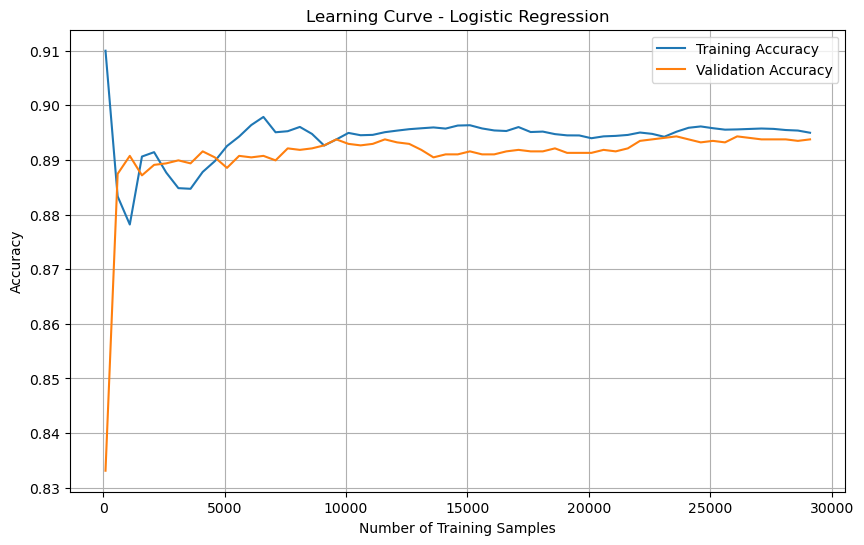

In [12]:
reg = LogisticRegression(max_iter=1000)
import matplotlib.pyplot as plt
train_accuracies = []
val_accuracies = []

# Vary the subset size and train the model on increasing subsets
for subset_size in range(100, len(X_train), 500):
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]

    reg.fit(X_subset, y_subset)

    train_accuracy = reg.score(X_subset, y_subset)
    val_accuracy = reg.score(X_val, y_val)
    
#     print(train_accuracy,val_accuracy)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
#Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(100, len(X_train), 500), train_accuracies, label='Training Accuracy')
plt.plot(range(100, len(X_train), 500), val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

If the validation score is consistently higher than the training score:
    
Data Leakage: Data leakage occurs when information from the validation or test set unintentionally influences the training process. Make sure that your data preprocessing, feature engineering, and model evaluation steps are correct and do not introduce any leakage.

Dataset Characteristics: Sometimes, the validation set might be easier or more representative of the test data compared to the training set. This can happen if the validation set captures the data distribution better or if the training set contains more noise.

Model Complexity: It's possible that the model is overly complex and is fitting noise in the training data. A complex model can lead to overfitting, where the model learns the noise in the training data and performs poorly on new data.

Insufficient Training Data: If the training set is relatively small, the model might not generalize well to new data. In such cases, increasing the size of the training data could help improve the training score and potentially narrow the gap with the validation score.

Hyperparameter Tuning: The model's hyperparameters might not be appropriately tuned. You could explore different hyperparameter settings using techniques like grid search or random search to find the best configuration.

Cross-Validation: Consider using cross-validation instead of a single validation set. Cross-validation provides a more robust estimate of model performance by averaging the scores over multiple validation folds.

I added more training data and it improved situation

In [14]:
reg.score(X_test,y_test)

0.8915760869565217

In [15]:
reg.score(X_train,y_train)

0.8948457805978759

In [16]:
reg.score(X_val,y_val)

0.8937688718089487

In [24]:
# coef of the features
coefficients = reg.coef_[0]

In [31]:
feature_names = X_modified.columns
feature_names

Index(['Latitude', 'Longitude', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Temp3pm', 'Location', 'WindGustDir',
       'WindDir9am', 'WindDir3pm', 'RainToday', 'Cloud9am', 'Cloud3pm'],
      dtype='object')

In [27]:
feature_coefficients = dict(zip(feature_names, coefficients))

In [28]:
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient}")

Latitude: 0.5498806660894647
Longitude: -1.0260614430051125
Rainfall: 0.026563971717831623
Evaporation: 0.02522655317190652
Sunshine: -0.2022785005088239
WindGustSpeed: 0.7537686686869944
WindSpeed9am: -0.04042994388410399
WindSpeed3pm: -0.3732911504584812
Humidity9am: 0.20728818432192803
Humidity3pm: 1.1754452793713168
Pressure9am: -0.14100818362826675
Temp3pm: 0.08173601814086187
Location: 6.7354885460517755
WindGustDir: 0.1209663649058596
WindDir9am: -1.3693127350760363
WindDir3pm: 2.109399332862077
RainToday: 0.9956064261740538
Cloud9am: 0.45710168799035367
Cloud3pm: 1.3227435115643593


In [35]:
summary_table = pd.DataFrame({'Feature Name': feature_names, 'Coefficient': coefficients})
summary_table

,Feature Name,Coefficient
0,Latitude,0.549881
1,Longitude,-1.026061
2,Rainfall,0.026564
3,Evaporation,0.025227
4,Sunshine,-0.202279
5,WindGustSpeed,0.753769
6,WindSpeed9am,-0.040430
7,WindSpeed3pm,-0.373291
8,Humidity9am,0.207288
9,Humidity3pm,1.175445


In [36]:
summary_table.index +=1

In [38]:
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]

In [41]:
summary_table.sort_index()

,Feature Name,Coefficient
0,Intercept,-4.255150
1,Latitude,0.549881
2,Longitude,-1.026061
3,Rainfall,0.026564
4,Evaporation,0.025227
5,Sunshine,-0.202279
6,WindGustSpeed,0.753769
7,WindSpeed9am,-0.040430
8,WindSpeed3pm,-0.373291
9,Humidity9am,0.207288


In [42]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [43]:
summary_table

,Feature Name,Coefficient,Odds_ratio
1,Latitude,0.549881,1.733046
2,Longitude,-1.026061,0.358416
3,Rainfall,0.026564,1.026920
4,Evaporation,0.025227,1.025547
5,Sunshine,-0.202279,0.816867
6,WindGustSpeed,0.753769,2.124993
7,WindSpeed9am,-0.040430,0.960376
8,WindSpeed3pm,-0.373291,0.688465
9,Humidity9am,0.207288,1.230337
10,Humidity3pm,1.175445,3.239585
